In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import pandas as pd
import json
from torch.utils.data import TensorDataset, DataLoader, random_split
import re

In [3]:
def get_data(filename):
    
    with open(filename, 'r', encoding='utf-8') as file:
        data = json.load(file)

    df = pd.DataFrame(data)
    return df

In [4]:
# data = get_data('output_file.json')
data = get_data('./rnn/only_action_method/output_file.json')

In [5]:
data.head()

,content_syntactic_blocstring,action_blocstring,changes_list_content_syntactic_,changes_list_action,src,userId,user_class,tweet_count,change_content_syntactic,change_action,change_change_dynamic_score,highest_change_in_content_syntactic,lowest_change_in_content_syntactic,standard_deviation_of_content_syntactic,highest_change_in_action,lowest_change_in_action,standard_deviation_of_action,diversity_action,diversity_content_syntactic,diversity_change_dynamics_score
0,(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmq...,rprp⚀pr□prrprrrprpprprprprprpprprprp□rprprprrr...,"[0.683772233983162, 0.6413313282702238, 0.7963...","{'content_syntactic': [0.683772233983162, 0.64...",astroturf,146048090,bot,274,0.452173,0.403716,0.860073,1.0,0.000000,0.337325,1.0,0.000000e+00,0.333447,0.653102,0.652532,0.450906
1,(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(m...,r□pr□rr□rp⚀r⚀TTTTTTT□r⚀p⚀π□p|⚀rr⚀rr⚀rr□r⚀r|⚀p⚀...,"[0.0600874600144512, 0.0, 0.004962809790010847...","{'content_syntactic': [0.0600874600144512, 0.0...",astroturf,797927149856403456,bot,275,0.481471,0.491328,0.586060,1.0,0.000000,0.432201,1.0,2.220446e-16,0.290351,0.707387,0.693840,0.151417
2,(mmt)(mmt)(qt)(qt)(qt)(mqt)(qt)(t)(qt)(qt)(Em)...,r□r⚀r⚀rr□rrr□r□r⚀rrr⚀r|⚁rrrrr□rrrrrr□rpprrrp□r...,"[0.4050577935998917, 0.4777670321329065, 0.013...","{'content_syntactic': [0.4050577935998917, 0.4...",astroturf,1046169889138868225,bot,277,0.431741,0.369664,1.066061,1.0,0.000000,0.435529,1.0,2.220446e-16,0.249736,0.676182,0.644029,0.297367
3,(mmt)(mmmmmmqt)(mmmmmmmmmqt)(mmt)(mmt)(qt)(mmm...,prrpp□rrrrrrrrrrrrrr□rr□rrr□rrprrrrrrr□prrrrrr...,"[0.6288092648051271, 0.7846125524146785, 1.0, ...","{'content_syntactic': [0.6288092648051271, 0.7...",astroturf,1085010463128195073,bot,244,0.183893,0.425183,1.532266,1.0,0.000000,0.365115,1.0,4.622382e-02,0.349031,0.698081,0.620676,0.211830
4,(mmmmmmmqt)|(Em)|(t)(mmqt)(mt)(mmt)|(qt)(HUqt)...,p|⚁p|⚀p□p□p□p|⚁rrrrrrrrpr□prrprr□rrrprrprrrprp...,"[1.0, 1.0, 0.7426748822671673, 0.9264785377906...","{'content_syntactic': [1.0, 1.0, 0.74267488226...",astroturf,1613166488,bot,245,0.812726,0.547337,0.791417,1.0,0.373736,0.207269,1.0,2.220446e-16,0.289094,0.680286,0.766445,0.627025


In [6]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.utils import shuffle


print("Original class distribution:")
print(data['user_class'].value_counts())

# Separate data by user_class
bots = data[data['user_class'] == 'bot']
humans = data[data['user_class'] == 'human']

# Select the minimum class size
min_class_size = min(len(bots), len(humans))

# Downsample each class to the minimum class size
bots_balanced = bots.sample(n=min_class_size, random_state=1)
humans_balanced = humans.sample(n=min_class_size, random_state=1)

# Combine the balanced classes
balanced_data = pd.concat([bots_balanced, humans_balanced])

# Shuffle the data
balanced_data = shuffle(balanced_data, random_state=1).reset_index(drop=True)

print("Balanced class distribution:")
print(balanced_data['user_class'].value_counts())

data = balanced_data

Original class distribution:
user_class
bot      44457
human    39219
Name: count, dtype: int64
Balanced class distribution:
user_class
bot      39219
human    39219
Name: count, dtype: int64


In [8]:
print("data shape", data.shape)
print("columns", data.columns)

data shape (78438, 20)
columns Index(['content_syntactic_blocstring', 'action_blocstring',
       'changes_list_content_syntactic_', 'changes_list_action', 'src',
       'userId', 'user_class', 'tweet_count', 'change_content_syntactic',
       'change_action', 'change_change_dynamic_score',
       'highest_change_in_content_syntactic',
       'lowest_change_in_content_syntactic',
       'standard_deviation_of_content_syntactic', 'highest_change_in_action',
       'lowest_change_in_action', 'standard_deviation_of_action',
       'diversity_action', 'diversity_content_syntactic',
       'diversity_change_dynamics_score'],
      dtype='object')


In [9]:
def map_action_to_content(action_string, content_string):
    """
    Maps each valid character in the action string to the corresponding group in the content string,
    skipping non-character symbols and formatting the output as specified.

    Args:
    action_string (str): A string where each character represents an action.
    content_string (str): A string containing groups inside parentheses.

    Returns:
    str: A formatted string where each action is paired with a content group.
    """
    # Parse content_string to extract groups inside parentheses
    content_groups = re.findall(r'\((.*?)\)', content_string)
    
    # Valid characters are alphabetic only
    valid_actions = [char for char in action_string if char.isalpha()]
    
    # Pair valid actions with corresponding content groups
    concatenated_output = []
    for i, char in enumerate(valid_actions):
        if i < len(content_groups):  # Ensure no out-of-bound errors
            concatenated_output.append(f"({char} -> {content_groups[i]})")
        else:
            break

    # Format as groups divided by "|"
    return "|".join(
        ["".join(concatenated_output[i:i + 4]) for i in range(0, len(concatenated_output), 4)]
    )

In [10]:
import json
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd

class UserDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = map_action_to_content(self.data.loc[idx, 'action_blocstring'], self.data.loc[idx, 'content_syntactic_blocstring'])
        # print("action", self.data.loc[idx, 'action_blocstring'])
        # print("content", self.data.loc[idx, 'content_syntactic_blocstring'])
        # print("text", text)
        label = 1 if self.data.loc[idx, 'user_class'] == 'bot' else 0
        return {
            'text': text, 
            'label': label 
        }

dataset = UserDataset(data)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example usage: Iterate through the test loader
# for batch in val_loader:
#     print(batch['text'], batch['label'])


In [11]:
# Counter: subclass of Python's dictionary used for counting hashable objects, in this case, tokens (words).
# OrderedDict: subclass of Python's dictionary that remembers the insertion order of keys. It is used to store tokens in a specific order based on frequency.
from collections import Counter, OrderedDict
# re: A module for working with regular expressions, used to manipulate and clean text.
import re

# Token counts and vocab creation
# Initializes an empty Counter object to hold the frequency of each token in the dataset.
token_counts = Counter()

# Define tokenizer
def tokenizer(text):

    #  replace | with " "
    # text = text.replace("|", " ")
    tokens = re.findall(r'\((.*?)\)|\|', text)
    return tokens

# Tokenize the training data and populate token_counts
for entry in test_dataset:  # Assuming train_dataset is a dataset with 'text'
    line = entry['text']
    tokens = tokenizer(line)
    token_counts.update(tokens)

# Sort tokens by frequency
# token_counts.items() returns the tokens and their respective counts as a list of tuples (e.g., [(token1, count1), (token2, count2), ...])
# key=lambda x: x[1] means that the sorting is based on the count (x[1]), which is the second element of each tuple
# reverse=True means that the most frequent tokens appear first in the sorted list.
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Create an ordered dictionary for the vocab
ordered_dict = OrderedDict(sorted_by_freq_tuples)

# The padding token (pad) is used to ensure that all sequences in a batch have the same length.
# The unknown token (unk) is used to represent words that are not found in the model's vocabulary (the top 69021 words in your case).
# Any word that doesn't appear in the vocabulary is replaced by the unk token during tokenization.
# This is critical for handling unseen words during inference, where the model encounters words that were not present in the training data.
# Create vocab dictionary with special tokens
# Initializes the vocab dictionary with two special tokens
vocab = {"<pad>": 0, "<unk>": 1}

for idx, (token, count) in enumerate(ordered_dict.items(), start=2):  # Start from 2 to skip the special tokens
    vocab[token] = idx


# Print the vocabulary size (should be 69023)
print('Vocab-size:', len(vocab))
print('vocab', vocab)
# --- Rationale:
#
# By assigning frequent words lower indices, we can optimize memory and computational efficiency.
# Words that appear infrequently can either be assigned higher indices (in case we want to keep them) or omitted from the vocabulary entirely.

Vocab-size: 4109
vocab {'<pad>': 0, '<unk>': 1, '': 2, 'T -> t': 3, 'T -> Ut': 4, 'p -> t': 5, 'r -> qt': 6, 'r -> t': 7, 'T -> qt': 8, 'r -> Et': 9, 'r -> Ut': 10, 'T -> mt': 11, 'T -> Et': 12, 'p -> mt': 13, 'T -> Ht': 14, 'T -> mUt': 15, 'r -> mqt': 16, 'T -> HUt': 17, 'r -> Hqt': 18, 'T -> E': 19, 'r -> Ht': 20, 'T -> mqt': 21, 'r -> EHt': 22, 'p -> qt': 23, 'r -> mt': 24, 'r -> mUt': 25, 'r -> EUt': 26, 'p -> mmt': 27, 'T -> HHUt': 28, 'T -> Hqt': 29, 'r -> mmqt': 30, 'r -> HUt': 31, 'T -> UUt': 32, 'r -> Emt': 33, 'r -> Hmqt': 34, 'T -> EUt': 35, 'T -> HHt': 36, 'T -> Hmt': 37, 'r -> HHqt': 38, 'T -> U': 39, 'r -> E': 40, 'p -> mqt': 41, 'T -> EHt': 42, 'T -> HHHUt': 43, 'T -> mmt': 44, 'r -> EHmt': 45, 'r -> HHHUt': 46, 'T -> HmUt': 47, 'r -> HHUt': 48, 'r -> EHHt': 49, 'r -> EEt': 50, 'p -> Ht': 51, 'p -> E': 52, 'r -> HHt': 53, 'p -> mmmt': 54, 'r -> Hmt': 55, 'π -> t': 56, 'T -> Emt': 57, 'p -> Et': 58, 'T -> HHHHHUt': 59, 'r -> mmmqt': 60, 'r -> U': 61, 'π -> qt': 62, 'p -> 

In [12]:
# action r⚀r|⚀pr|⚁r□r⚀r|⚁T|⚁T|⚁r|⚁r⚀r|⚁pp|⚀r|⚁r|⚀r⚀r|⚁T|⚁r|⚁r|⚁T⚀T□r|⚁T|⚁rrr|⚁rr□r|⚁T|⚁T□T□T|⚁T|⚁r|⚁r|⚁r⚀Tr|⚁T|⚁T|⚁r|□T⚀r□r|⚁r|⚁r|⚁rr|⚀Tr⚀T□r|⚁r⚀T|⚁T|⚁rr|⚁T□T⚀T|⚀T⚀π⚀T|⚁T|⚁r□r|⚁r|⚁T|⚁rr|⚁Tπ|⚁Tr|⚀TT□T⚀T□rT|⚁r⚀r⚀r|⚁r|⚁r|⚁T⚀T|⚀r|⚁r□r□r□r⚀r|⚀r|⚁r⚀r⚀r|⚀T|⚁T|⚁r|⚁T|⚁T|⚁r|⚀r|⚁rT|⚀r|⚁T|⚁r□T□T□r|⚁T|⚂r|⚁T|⚁r|⚀p□p|⚁T|⚁T□rp|⚁r|⚁T|⚀rr|⚁r⚀rr|□r□Tr|⚁r|⚁r|⚁r|⚁r|⚀T⚀T□T⚀rppp⚀r|⚀T|⚁pr|⚁r|⚁r⚀r|⚁T|⚁T|⚁r|⚁T⚀π⚀π|⚀r|⚁T|⚁T|⚁p⚀pp|⚁T|⚀T|⚁p|⚁T⚀π⚀T|⚀p|⚁r|⚁r⚀p□ppp|⚀rr□r⚀rp|⚁r|⚁rr|⚁r|⚁T|⚀T⚀r□T⚀r|⚁T|⚁T⚀T⚀π|⚁r|⚁T□p|⚀T|⚁r|⚁T⚀p|⚁r|⚁r⚀r|⚀p□ρρ□T|⚁r

# content (E)(EHt)|(t)(t)|(Et)(qt)(Et)|(qt)|(t)|(EEEt)|(t)(Et)|(mmt)(t)|(qt)|(qt)|(Et)(t)|(t)|(qt)|(qt)|(t)(qt)(t)|(t)|(qt)(qt)(qt)|(qt)(E)(qt)|(qt)|(t)(qt)(qt)|(t)|(EEEt)|(E)|(EEEHt)(qt)(Et)|(t)|(t)|(Et)|(t)(t)(Ut)|(t)|(Et)|(Et)(EEt)|(qt)(qt)(t)(t)|(qt)(t)|(qt)|(Et)(EEEEt)|(qt)(t)(t)|(t)(t)(t)|(t)|(EHt)(qt)|(t)|(t)|(t)(t)|(t)(t)|(t)(qt)|(t)(t)(t)(t)(Et)(t)|(t)(t)(qt)|(t)|(EEEEmt)|(t)(t)|(HHmqt)|(qt)(Et)(EHmt)(Hqt)(EHHt)|(qt)|(t)(Et)(qt)|(t)|(t)|(Emt)|(qt)|(qt)|(qt)|(t)|(E)(t)|(Et)|(t)|(qt)(qt)(t)(qt)|(t)|(Et)|(t)|(EHUt)|(t)(t)|(t)|(t)(t)(t)|(t)|(t)|(t)(EHHt)|(qt)(qt)(t)|(qt)(qt)(qt)|(Et)|(qt)|(qt)|(Et)|(t)(t)(t)(t)(t)(t)(t)(t)|(t)|(t)(qt)|(qt)|(Et)(qt)|(Et)|(t)|(qt)|(qt)(t)(t)|(EEt)|(t)|(t)|(t)(t)(t)|(t)|(t)|(t)|(t)(t)(t)|(t)|(Et)|(qt)(t)(t)(t)(t)|(Hqt)(EHHt)(Hqt)(Et)(t)|(Hqt)|(Et)(qt)|(Et)|(t)|(t)(t)(t)(t)|(t)|(t)(t)(t)|(EEt)|(t)(t)|(t)|(Hqt)|(qt)(t)|(qt)|(qt)(qt)|(t)(t)(t)(t)|(t)

# text (r -> E)(r -> EHt)(p -> t)(r -> t)|(r -> Et)(r -> qt)(r -> Et)(T -> qt)|(T -> t)(r -> EEEt)(r -> t)(r -> Et)|(p -> mmt)(p -> t)(r -> qt)(r -> qt)|(r -> Et)(r -> t)(T -> t)(r -> qt)|(r -> qt)(T -> t)(T -> qt)(r -> t)|(T -> t)(r -> qt)(r -> qt)(r -> qt)|(r -> qt)(r -> E)(r -> qt)(T -> qt)|(T -> t)(T -> qt)(T -> qt)(T -> t)|(r -> EEEt)(r -> E)(r -> EEEHt)(T -> qt)|(r -> Et)(T -> t)(T -> t)(r -> Et)|(T -> t)(r -> t)(r -> Ut)(r -> t)|(r -> Et)(r -> Et)(r -> EEt)(T -> qt)|(r -> qt)(T -> t)(r -> t)(r -> qt)|(T -> t)(T -> qt)(r -> Et)(r -> EEEEt)|(T -> qt)(T -> t)(T -> t)(T -> t)|(π -> t)(T -> t)(T -> t)(r -> EHt)|(r -> qt)(r -> t)(T -> t)(r -> t)|(r -> t)(T -> t)(π -> t)(T -> t)|(r -> qt)(T -> t)(T -> t)(T -> t)|(T -> t)(r -> Et)(T -> t)(r -> t)|(r -> t)(r -> qt)(r -> t)(r -> EEEEmt)|(T -> t)(T -> t)(r -> HHmqt)(r -> qt)|(r -> Et)(r -> EHmt)(r -> Hqt)(r -> EHHt)|(r -> qt)(r -> t)(r -> Et)(r -> qt)|(T -> t)(T -> t)(r -> Emt)(T -> qt)|(T -> qt)(r -> qt)(r -> t)(r -> E)|(T -> t)(r -> Et)(T -> t)(r -> qt)|(T -> qt)(T -> t)(r -> qt)(T -> t)|(r -> Et)(T -> t)(r -> EHUt)(p -> t)|(p -> t)(T -> t)(T -> t)(r -> t)|(p -> t)(r -> t)(T -> t)(r -> t)|(r -> EHHt)(r -> qt)(r -> qt)(r -> t)|(r -> qt)(T -> qt)(r -> qt)(r -> Et)|(r -> qt)(r -> qt)(r -> Et)(T -> t)|(T -> t)(T -> t)(r -> t)(p -> t)|(p -> t)(p -> t)(r -> t)(T -> t)|(p -> t)(r -> qt)(r -> qt)(r -> Et)|(r -> qt)(T -> Et)(T -> t)(r -> qt)|(T -> qt)(π -> t)(π -> t)(r -> EEt)|(T -> t)(T -> t)(p -> t)(p -> t)|(p -> t)(T -> t)(T -> t)(p -> t)|(T -> t)(π -> t)(T -> t)(p -> t)|(r -> Et)(r -> qt)(p -> t)(p -> t)|(p -> t)(p -> t)(r -> Hqt)(r -> EHHt)|(r -> Hqt)(r -> Et)(p -> t)(r -> Hqt)|(r -> Et)(r -> qt)(r -> Et)(T -> t)|(T -> t)(r -> t)(T -> t)(r -> t)|(T -> t)(T -> t)(T -> t)(π -> t)|(r -> EEt)(T -> t)(p -> t)(T -> t)|(r -> Hqt)(T -> qt)(p -> t)(r -> qt)|(r -> qt)(r -> qt)(p -> t)(ρ -> t)|(ρ -> t)(T -> t)(r -> t)


def encode(tokens):
    #If the token does not exist in the vocab, the function returns the index of the <unk>
    return [vocab.get(token, vocab["<unk>"]) for token in tokens]
# Example usage
print(encode(tokenizer('(r -> E)(r -> EHt)(p -> t)(r -> t)|(r -> Et)(r -> qt)(r -> Et)(T -> qt)|(T -> t)(r -> EEEt)(r -> t)(r -> Et)|(p -> mmt)(p -> t)(r -> qt)(r -> qt)|(r -> Et)(r -> t)(T -> t)(r -> qt)|(r -> qt)(T -> t)(T -> qt)(r -> t)|(T -> t)(r -> qt)(r -> qt)(r -> qt)|(r -> qt)(r -> E)(r -> qt)(T -> qt)|(T -> t)(T -> qt)(T -> qt)(T -> t)|(r -> EEEt)(r -> E)(r -> EEEHt)(T -> qt)|(r -> Et)(T -> t)(T -> t)(r -> Et)|(T -> t)(r -> t)(r -> Ut)(r -> t)|(r -> Et)(r -> Et)(r -> EEt)(T -> qt)|(r -> qt)(T -> t)(r -> t)(r -> qt)|(T -> t)(T -> qt)(r -> Et)(r -> EEEEt)|(T -> qt)(T -> t)(T -> t)(T -> t)|(π -> t)(T -> t)(T -> t)(r -> EHt)|(r -> qt)(r -> t)(T -> t)(r -> t)|(r -> t)(T -> t)(π -> t)(T -> t)|(r -> qt)(T -> t)(T -> t)(T -> t)|(T -> t)(r -> Et)(T -> t)(r -> t)|(r -> t)(r -> qt)(r -> t)(r -> EEEEmt)|(T -> t)(T -> t)(r -> HHmqt)(r -> qt)|(r -> Et)(r -> EHmt)(r -> Hqt)(r -> EHHt)|(r -> qt)(r -> t)(r -> Et)(r -> qt)|(T -> t)(T -> t)(r -> Emt)(T -> qt)|(T -> qt)(r -> qt)(r -> t)(r -> E)|(T -> t)(r -> Et)(T -> t)(r -> qt)|(T -> qt)(T -> t)(r -> qt)(T -> t)|(r -> Et)(T -> t)(r -> EHUt)(p -> t)|(p -> t)(T -> t)(T -> t)(r -> t)|(p -> t)(r -> t)(T -> t)(r -> t)|(r -> EHHt)(r -> qt)(r -> qt)(r -> t)|(r -> qt)(T -> qt)(r -> qt)(r -> Et)|(r -> qt)(r -> qt)(r -> Et)(T -> t)|(T -> t)(T -> t)(r -> t)(p -> t)|(p -> t)(p -> t)(r -> t)(T -> t)|(p -> t)(r -> qt)(r -> qt)(r -> Et)|(r -> qt)(T -> Et)(T -> t)(r -> qt)|(T -> qt)(π -> t)(π -> t)(r -> EEt)|(T -> t)(T -> t)(p -> t)(p -> t)|(p -> t)(T -> t)(T -> t)(p -> t)|(T -> t)(π -> t)(T -> t)(p -> t)|(r -> Et)(r -> qt)(p -> t)(p -> t)|(p -> t)(p -> t)(r -> Hqt)(r -> EHHt)|(r -> Hqt)(r -> Et)(p -> t)(r -> Hqt)|(r -> Et)(r -> qt)(r -> Et)(T -> t)|(T -> t)(r -> t)(T -> t)(r -> t)|(T -> t)(T -> t)(T -> t)(π -> t)|(r -> EEt)(T -> t)(p -> t)(T -> t)|(r -> Hqt)(T -> qt)(p -> t)(r -> qt)|(r -> qt)(r -> qt)(p -> t)(ρ -> t)|(ρ -> t)(T -> t)(r -> t)')))  # Should output something like [11, 7, 35, 457]

[40, 22, 5, 7, 2, 9, 6, 9, 8, 2, 3, 116, 7, 9, 2, 27, 5, 6, 6, 2, 9, 7, 3, 6, 2, 6, 3, 8, 7, 2, 3, 6, 6, 6, 2, 6, 40, 6, 8, 2, 3, 8, 8, 3, 2, 116, 40, 278, 8, 2, 9, 3, 3, 9, 2, 3, 7, 10, 7, 2, 9, 9, 50, 8, 2, 6, 3, 7, 6, 2, 3, 8, 9, 80, 2, 8, 3, 3, 3, 2, 56, 3, 3, 22, 2, 6, 7, 3, 7, 2, 7, 3, 56, 3, 2, 6, 3, 3, 3, 2, 3, 9, 3, 7, 2, 7, 6, 7, 264, 2, 3, 3, 84, 6, 2, 9, 45, 18, 49, 2, 6, 7, 9, 6, 2, 3, 3, 33, 8, 2, 8, 6, 7, 40, 2, 3, 9, 3, 6, 2, 8, 3, 6, 3, 2, 9, 3, 79, 5, 2, 5, 3, 3, 7, 2, 5, 7, 3, 7, 2, 49, 6, 6, 7, 2, 6, 8, 6, 9, 2, 6, 6, 9, 3, 2, 3, 3, 7, 5, 2, 5, 5, 7, 3, 2, 5, 6, 6, 9, 2, 6, 12, 3, 6, 2, 8, 56, 56, 50, 2, 3, 3, 5, 5, 2, 5, 3, 3, 5, 2, 3, 56, 3, 5, 2, 9, 6, 5, 5, 2, 5, 5, 18, 49, 2, 18, 9, 5, 18, 2, 9, 6, 9, 3, 2, 3, 7, 3, 7, 2, 3, 3, 3, 56, 2, 50, 3, 5, 3, 2, 18, 8, 5, 6, 2, 6, 6, 5, 186, 2, 186, 3, 7]


In [13]:
if not torch.cuda.is_available():
    print("Warning: this code may be very slow on CPU")

In [14]:
import torch
import torch.nn as nn
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Use the manual vocab creation process from earlier
# Assuming `vocab` and `tokenizer` are already defined

#text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
# Updated text pipeline
text_pipeline = lambda x: [vocab.get(token, vocab["<unk>"]) for token in tokenizer(x)]

label_pipeline = lambda x: float(x)  # Convert to float to match the output

# Batch collation function
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for entry in batch:  # Each 'entry' is a dictionary with 'text' and 'label'
        _label = entry['label']
        _text = entry['text']

        # Process labels and text
        label_list.append(label_pipeline(_label))  # Convert labels using label_pipeline
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)  # Convert text to indices

        # Store processed text and its length
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))

    # Convert lists to tensors and pad sequences
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(text_list, batch_first=True)

    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [15]:
#-----  Example usage with DataLoader -----#
## Take a small batch

dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch = next(iter(dataloader))

# Print the output batch
print("Text batch:", text_batch)
print("Label batch:", label_batch)
print("Length batch:", length_batch)
print("Text batch shape:", text_batch.shape)

Text batch: tensor([[  3,   3,  12,  ...,   0,   0,   0],
        [  3,   3, 195,  ...,   0,   0,   0],
        [ 22,  20, 104,  ...,   0,   0,   0],
        [  5,  29,   8,  ..., 356,   5,   6]], device='cuda:0')
Label batch: tensor([1., 0., 1., 0.], device='cuda:0')
Length batch: tensor([ 31, 206, 181, 329], device='cuda:0')
Text batch shape: torch.Size([4, 329])


In [16]:
## Batching the datasets
batch_size = 32

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
val_dl = DataLoader(val_dataset, batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(test_dataset, batch_size=batch_size,
                     shuffle=False, collate_fn=collate_batch)

In [17]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)

In [18]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:  # Loop through batches in dataloader
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:  # Loop through batches in dataloader
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

Epoch 1 - accuracy: 0.7749, val_accuracy: 0.7767


Epoch 2 - accuracy: 0.8170, val_accuracy: 0.8259


Epoch 3 - accuracy: 0.8295, val_accuracy: 0.8071


Epoch 4 - accuracy: 0.8433, val_accuracy: 0.8530


Epoch 5 - accuracy: 0.8586, val_accuracy: 0.8616


Epoch 6 - accuracy: 0.8644, val_accuracy: 0.8652


Epoch 7 - accuracy: 0.8650, val_accuracy: 0.8659


Epoch 8 - accuracy: 0.8703, val_accuracy: 0.8695


Epoch 9 - accuracy: 0.8743, val_accuracy: 0.8667


Epoch 10 - accuracy: 0.8758, val_accuracy: 0.8697


Epoch 11 - accuracy: 0.8781, val_accuracy: 0.8693


Epoch 12 - accuracy: 0.8697, val_accuracy: 0.8506


Epoch 13 - accuracy: 0.8556, val_accuracy: 0.8399


Epoch 14 - accuracy: 0.8630, val_accuracy: 0.8596


Epoch 15 - accuracy: 0.8704, val_accuracy: 0.8666


Epoch 16 - accuracy: 0.8745, val_accuracy: 0.8690


Epoch 17 - accuracy: 0.8809, val_accuracy: 0.8686


Epoch 18 - accuracy: 0.8845, val_accuracy: 0.8701


Epoch 19 - accuracy: 0.8857, val_accuracy: 0.8703


Epoch 20 - accuracy: 0.8873, val_accuracy: 0.8712


Epoch 21 - accuracy: 0.8889, val_accuracy: 0.8692


Epoch 22 - accuracy: 0.8914, val_accuracy: 0.8688


Epoch 23 - accuracy: 0.8928, val_accuracy: 0.8674


Epoch 24 - accuracy: 0.8951, val_accuracy: 0.8700


Epoch 25 - accuracy: 0.8964, val_accuracy: 0.8659


Epoch 26 - accuracy: 0.8985, val_accuracy: 0.8672


Epoch 27 - accuracy: 0.9020, val_accuracy: 0.8645


Epoch 28 - accuracy: 0.9028, val_accuracy: 0.8643


Epoch 29 - accuracy: 0.9050, val_accuracy: 0.8651


Epoch 30 - accuracy: 0.9075, val_accuracy: 0.8634


Epoch 31 - accuracy: 0.9096, val_accuracy: 0.8642


Epoch 32 - accuracy: 0.9123, val_accuracy: 0.8583


Epoch 33 - accuracy: 0.9139, val_accuracy: 0.8601


Epoch 34 - accuracy: 0.9159, val_accuracy: 0.8609


Epoch 35 - accuracy: 0.9181, val_accuracy: 0.8602


Epoch 36 - accuracy: 0.9204, val_accuracy: 0.8567


Epoch 37 - accuracy: 0.9242, val_accuracy: 0.8629


Epoch 38 - accuracy: 0.9258, val_accuracy: 0.8592


Epoch 39 - accuracy: 0.9273, val_accuracy: 0.8551


Epoch 40 - accuracy: 0.9298, val_accuracy: 0.8539


Epoch 41 - accuracy: 0.9332, val_accuracy: 0.8577


Epoch 42 - accuracy: 0.9344, val_accuracy: 0.8506


Epoch 43 - accuracy: 0.9358, val_accuracy: 0.8568


Epoch 44 - accuracy: 0.9388, val_accuracy: 0.8518


Epoch 45 - accuracy: 0.9411, val_accuracy: 0.8533


Epoch 46 - accuracy: 0.9427, val_accuracy: 0.8535


Epoch 47 - accuracy: 0.9436, val_accuracy: 0.8456


Epoch 48 - accuracy: 0.9450, val_accuracy: 0.8506


Epoch 49 - accuracy: 0.9468, val_accuracy: 0.8530


Epoch 50 - accuracy: 0.9488, val_accuracy: 0.8455


Epoch 51 - accuracy: 0.9485, val_accuracy: 0.8465


Epoch 52 - accuracy: 0.9484, val_accuracy: 0.8395


Epoch 53 - accuracy: 0.9514, val_accuracy: 0.8453


Epoch 54 - accuracy: 0.9525, val_accuracy: 0.8432


Epoch 55 - accuracy: 0.9525, val_accuracy: 0.8468


Epoch 56 - accuracy: 0.9501, val_accuracy: 0.8433


Epoch 57 - accuracy: 0.9555, val_accuracy: 0.8446


Epoch 58 - accuracy: 0.9559, val_accuracy: 0.8445


Epoch 59 - accuracy: 0.9566, val_accuracy: 0.8468


Epoch 60 - accuracy: 0.9551, val_accuracy: 0.8393


Epoch 61 - accuracy: 0.9098, val_accuracy: 0.8454


Epoch 62 - accuracy: 0.9285, val_accuracy: 0.8465


Epoch 63 - accuracy: 0.9421, val_accuracy: 0.8461


Epoch 64 - accuracy: 0.9464, val_accuracy: 0.8473


Epoch 65 - accuracy: 0.9417, val_accuracy: 0.8445


Epoch 66 - accuracy: 0.9436, val_accuracy: 0.8445


Epoch 67 - accuracy: 0.9467, val_accuracy: 0.8452


Epoch 68 - accuracy: 0.9460, val_accuracy: 0.8449


Epoch 69 - accuracy: 0.9525, val_accuracy: 0.8417


Epoch 70 - accuracy: 0.9546, val_accuracy: 0.8446


Epoch 71 - accuracy: 0.9560, val_accuracy: 0.8453


Epoch 72 - accuracy: 0.9582, val_accuracy: 0.8419


Epoch 73 - accuracy: 0.9571, val_accuracy: 0.8441


Epoch 74 - accuracy: 0.9581, val_accuracy: 0.8461


Epoch 75 - accuracy: 0.9583, val_accuracy: 0.8467


Epoch 76 - accuracy: 0.9615, val_accuracy: 0.8354


Epoch 77 - accuracy: 0.9616, val_accuracy: 0.8442


Epoch 78 - accuracy: 0.9647, val_accuracy: 0.8442


Epoch 79 - accuracy: 0.9648, val_accuracy: 0.8432


Epoch 80 - accuracy: 0.9661, val_accuracy: 0.8401


Epoch 81 - accuracy: 0.9655, val_accuracy: 0.8433


Epoch 82 - accuracy: 0.9661, val_accuracy: 0.8421


Epoch 83 - accuracy: 0.9666, val_accuracy: 0.8458


Epoch 84 - accuracy: 0.9670, val_accuracy: 0.8397


Epoch 85 - accuracy: 0.9665, val_accuracy: 0.8440


Epoch 86 - accuracy: 0.9672, val_accuracy: 0.8390


Epoch 87 - accuracy: 0.9712, val_accuracy: 0.8460


Epoch 88 - accuracy: 0.9704, val_accuracy: 0.8403


Epoch 89 - accuracy: 0.9661, val_accuracy: 0.8413


Epoch 90 - accuracy: 0.9701, val_accuracy: 0.8428


Epoch 91 - accuracy: 0.9691, val_accuracy: 0.8434


Epoch 92 - accuracy: 0.9699, val_accuracy: 0.8405


Epoch 93 - accuracy: 0.9698, val_accuracy: 0.8409


Epoch 94 - accuracy: 0.9714, val_accuracy: 0.8448


Epoch 95 - accuracy: 0.9706, val_accuracy: 0.8391


Epoch 96 - accuracy: 0.9702, val_accuracy: 0.8394


Epoch 97 - accuracy: 0.9706, val_accuracy: 0.8389


Epoch 98 - accuracy: 0.9720, val_accuracy: 0.8392


Epoch 99 - accuracy: 0.9721, val_accuracy: 0.8416


Epoch 100 - accuracy: 0.9720, val_accuracy: 0.8390


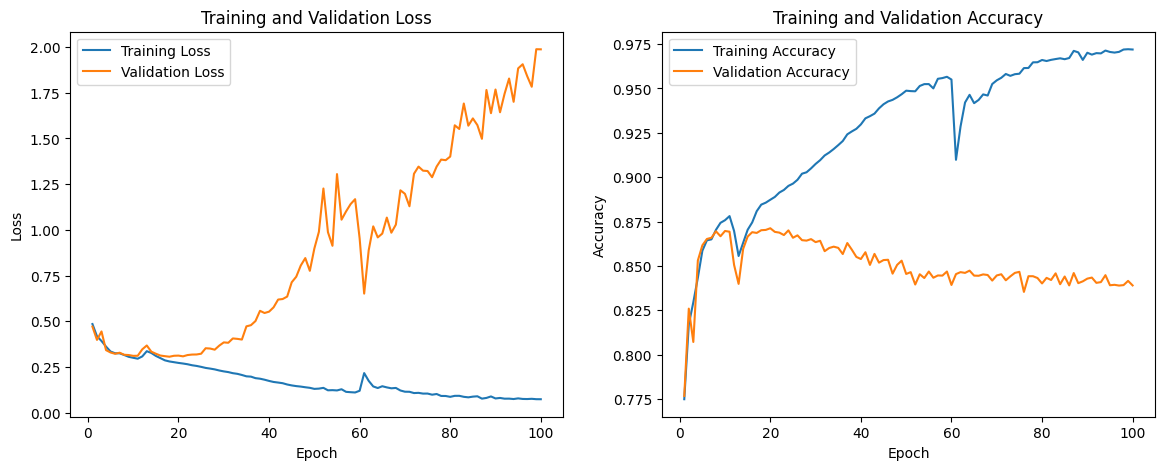

In [20]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize lists to store training and validation metrics for each epoch
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []

num_epochs = 100
torch.manual_seed(1)

# Training loop with metrics storage
for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(val_dl)
    
    # Store metrics
    train_accuracies.append(acc_train)
    train_losses.append(loss_train)
    valid_accuracies.append(acc_valid)
    valid_losses.append(loss_valid)

    print(f'Epoch {epoch + 1} - accuracy: {acc_train:.4f}, val_accuracy: {acc_valid:.4f}')

# Plotting training and validation losses
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [21]:
acc_test, _ = evaluate(test_dl)
print(f'test_accuracy: {acc_test:.4f}')

test_accuracy: 0.8421


In [22]:
import pandas as pd
import torch
import random

# Function to preprocess and predict a single account
def predict_comment(text, model, vocab):
    model.eval()
    # Tokenize and encode the input text using the same tokenizer and vocab as used during training
    tokens = tokenizer(text)
    encoded_text = [vocab.get(token, vocab["<unk>"]) for token in tokens]

    # Convert the tokens to tensor and add batch dimension
    text_tensor = torch.tensor(encoded_text).unsqueeze(0).to(device)  # Add batch dimension
    lengths_tensor = torch.tensor([len(encoded_text)]).to(device)

    with torch.no_grad():
        prediction = model(text_tensor, lengths_tensor)[:, 0]

    # Apply threshold of 0.5 for binary classification
    prediction_label = 1 if prediction >= 0.5 else 0
    return prediction.item(), prediction_label

# List to store prediction results
results = []

# Iterate over all samples in the test dataset
for sample in test_dataset:
    account_string = sample['text']
    true_label = sample['label']
    predicted_value, predicted_label = predict_comment(account_string, model, vocab)

    # Append the data for each comment
    results.append({
        "comment": account_string,
        "true_label": true_label,
        "predicted_value": predicted_value,
        "predicted_label": predicted_label
    })

# Convert results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the results DataFrame to a CSV file
#given the path from job
results_df.to_csv("./rnn/only_action_method/results/predictions-both.csv", index=False)

print("Results saved to predictions.csv")

Results saved to predictions.csv


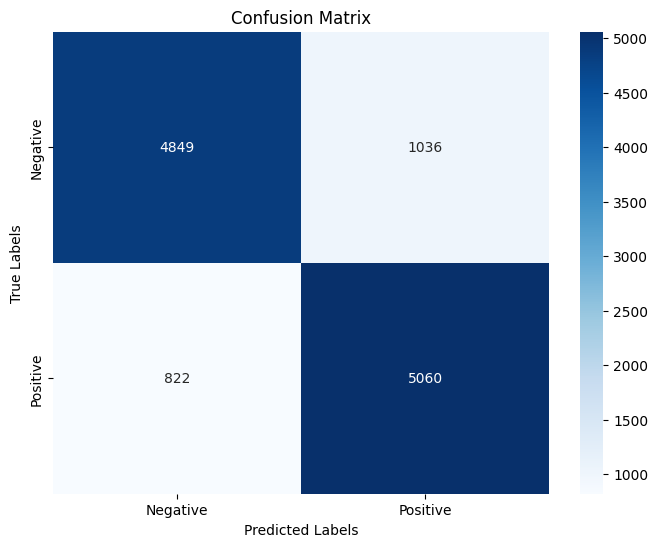

In [23]:
# Confusion matrix on the validation set
all_preds = []
all_labels = []

# Collect predictions and true labels from the validation set
for sample in test_dataset:
    account_string = sample['text']
    true_label = sample['label']
    predicted_value, predicted_label = predict_comment(account_string, model, vocab)  # Adjust if predict_comment takes a batch
    all_preds.append(predicted_label)
    all_labels.append(true_label)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
#given the path from job
results_df[results_df['true_label'] != results_df['predicted_label']].to_csv("./rnn/only_action_method/results/mismatches-both.csv")
results_df.shape

(11767, 4)